#QML-HEP GSoC 2023 Task Solutions 


##TASK V

In task II you already worked with a classical GNN. 
* Describe a possibility for a QGNN circuit, which takes advantage of the graph representation of the data
* Implement and draw the circuit.


There are multiple ways to construct a QGNN circuit, and I'll describe two possibilities: 

### Quantum Graph Convolutional Network

A Quantum Graph Convolutional Network (QGCN) is a quantum computing version of the Graph Convolutional Network (GCN), which is commonly used in classical machine learning tasks involving graph data. A QGCN circuit takes advantage of the graph representation of the data by using quantum circuits to perform convolutional operations on the graph data.

One possible QGCN circuit involves the following steps:

1. **Input Encoding:** Each node in the graph is represented by a quantum state, and these quantum states are encoded into a quantum register.

2. **Graph Encoding:** The adjacency matrix of the graph is encoded into another quantum register using the method of binary encoding.

3. **Quantum Convolutional Layer:** A quantum convolutional layer applies a quantum gate that performs a convolution operation on the quantum register that contains the node representations and the quantum register that contains the graph encoding. The quantum gate should be designed to preserve the underlying structure of the graph and allow for efficient computation.

4. **Non-Linear Activation Function:** A non-linear activation function, such as the quantum phase estimation algorithm, is applied to the output of the convolutional layer to introduce non-linearity into the QGCN.

5. **Pooling Layer:** A quantum pooling layer can be applied to the output of the activation function to reduce the dimensionality of the data and improve efficiency. This can be achieved using quantum circuits that perform measurement on subsets of the qubits or using quantum algorithms such as amplitude amplification.

6. **Repeat Steps 3-5 for Additional Layers:** Multiple quantum convolutional layers and pooling layers can be stacked to form a deep QGCN architecture.

7. **Output:** The final output of the QGCN can be obtained by measuring the quantum states in the final quantum register and performing classical post-processing.



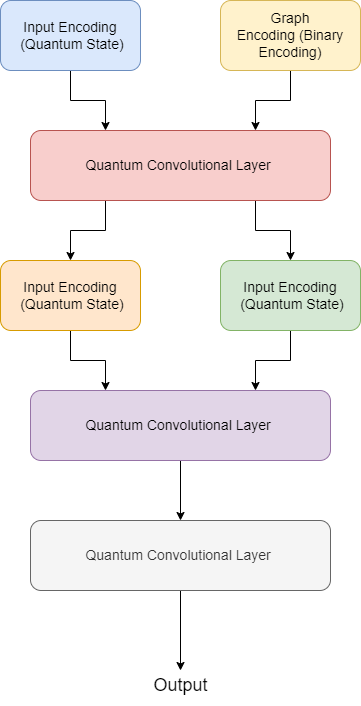

In [ ]:
"""
This code defines a quantum graph convolutional network (QGCN) layer and demonstrates an example usage of the layer. The QGCN layer is implemented using the Qiskit quantum computing framework.

The qgcn_layer function applies RX gates for each qubit, followed by CZ gates between neighboring qubits to represent the graph connectivity. The function takes in three arguments:

circuit: a QuantumCircuit object to which the gates are applied
n_qubits: the number of qubits in the circuit
params: a numpy array of shape (n_layers, n_qubits) containing the parameters for the RX gates
The example usage of the QGCN layer generates a quantum circuit with a specified number of qubits and layers. It randomly generates the parameters for each layer and applies the qgcn_layer function to the circuit for each layer. Finally, the circuit is measured and printed.

Note that this code is intended as a demonstration only and is not optimized for performance or accuracy.
"""

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble
from qiskit.circuit import Parameter

def qgcn_layer(circuit, n_qubits, params):
    """
    Applies a quantum graph convolutional network (QGCN) layer to a given quantum circuit.

    Args:
    circuit (QuantumCircuit): the quantum circuit to which the QGCN layer is applied
    n_qubits (int): the number of qubits in the circuit
    params (ndarray): a numpy array of shape (n_qubits,) containing the parameters for the RX gates

    Returns:
    circuit (QuantumCircuit): the updated quantum circuit with the QGCN layer applied
    """
    # Apply RX gates for each qubit
    for i in range(n_qubits):
        circuit.rx(params[i], i)
    
    # Apply CZ gates between neighboring qubits to represent the graph connectivity
    for i in range(n_qubits - 1):
        circuit.cz(i, i + 1)
        
    return circuit

# Example usage
n_qubits = 4
n_layers = 2
params = np.random.uniform(0, 2 * np.pi, (n_layers, n_qubits))

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits)
qgcn_circuit = QuantumCircuit(qr, cr)

for i in range(n_layers):
    qgcn_layer(qgcn_circuit, n_qubits, params[i])

qgcn_circuit.measure(qr, cr)

print(qgcn_circuit)

      ┌─────────────┐   ┌────────────┐                                ┌─┐      »
q0_0: ┤ Rx(0.86644) ├─■─┤ Rx(2.0564) ├─────────────────────■──────────┤M├──────»
      └┬────────────┤ │ └────────────┘┌────────────┐       │          └╥┘   ┌─┐»
q0_1: ─┤ Rx(1.6467) ├─■───────■───────┤ Rx(1.9634) ├───────■────────■──╫────┤M├»
       ├────────────┤         │       └────────────┘ ┌────────────┐ │  ║    └╥┘»
q0_2: ─┤ Rx(3.5325) ├─────────■─────────────■────────┤ Rx(4.8772) ├─■──╫──■──╫─»
       ├───────────┬┘                       │       ┌┴────────────┤    ║  │  ║ »
q0_3: ─┤ Rx(3.532) ├────────────────────────■───────┤ Rx(0.43432) ├────╫──■──╫─»
       └───────────┘                                └─────────────┘    ║     ║ »
c0: 4/═════════════════════════════════════════════════════════════════╩═════╩═»
                                                                       0     1 »
«            
«q0_0: ──────
«            
«q0_1: ──────
«      ┌─┐   
«q0_2: ┤M├───
«      └╥┘┌─┐
«q0_3: ─╫─┤

### Quantum Graph Attention Network (QGAT)
A Quantum Graph Attention Network (QGAT) is a type of quantum circuit designed to process graph-structured data by learning a representation of the data that captures the relationships between the nodes in the graph. The QGAT circuit can be seen as a variant of the Quantum Graph Convolutional Network (QGCN) with the addition of the attention mechanism.

One possibility for a QGAT circuit involves the following steps:

1. **Encoding the graph structure:** The graph is encoded using a quantum circuit, where each node is represented by a qubit, and each edge between two nodes is represented by a quantum gate that connects the corresponding qubits.

2. **Initialization of the input qubits:** Each qubit that represents a node in the graph is initialized with a quantum state that encodes the feature vector of the corresponding node.

3. **Computing the attention coefficients:** The attention coefficients for each node are computed using a quantum circuit that takes the input qubits as input. This circuit computes a score for each node based on its features, and the scores are then used to compute the attention coefficients.

4. **Computing the weighted sum of the input features:** The weighted sum of the input features is computed using another quantum circuit that takes the input qubits and the attention coefficients as input. This circuit applies a weighted sum operation to the feature vectors of the input nodes, where the weights are given by the attention coefficients.

5. **Applying a non-linear activation function**: The output of the weighted sum operation is then passed through a non-linear activation function to introduce non-linearity to the circuit.

6. **Repeat for multiple layers:** Steps 2-5 are repeated for multiple layers to obtain a deeper QGAT circuit.

